In [643]:
import numpy as np 
import matplotlib.pyplot as plt
#load the digits dataset
from sklearn.datasets import load_digits
from numpy import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.linear_model import Perceptron
from sklearn import metrics
import time
digits = load_digits()
# Print the number of 8 by 8 images
print("Data Size" , digits.data.shape)
# Print the number of labels
print("Number of Labels (1797,):", digits.target.shape)
X=digits.data
y=digits.target

Data Size (1797, 64)
Number of Labels (1797,): (1797,)


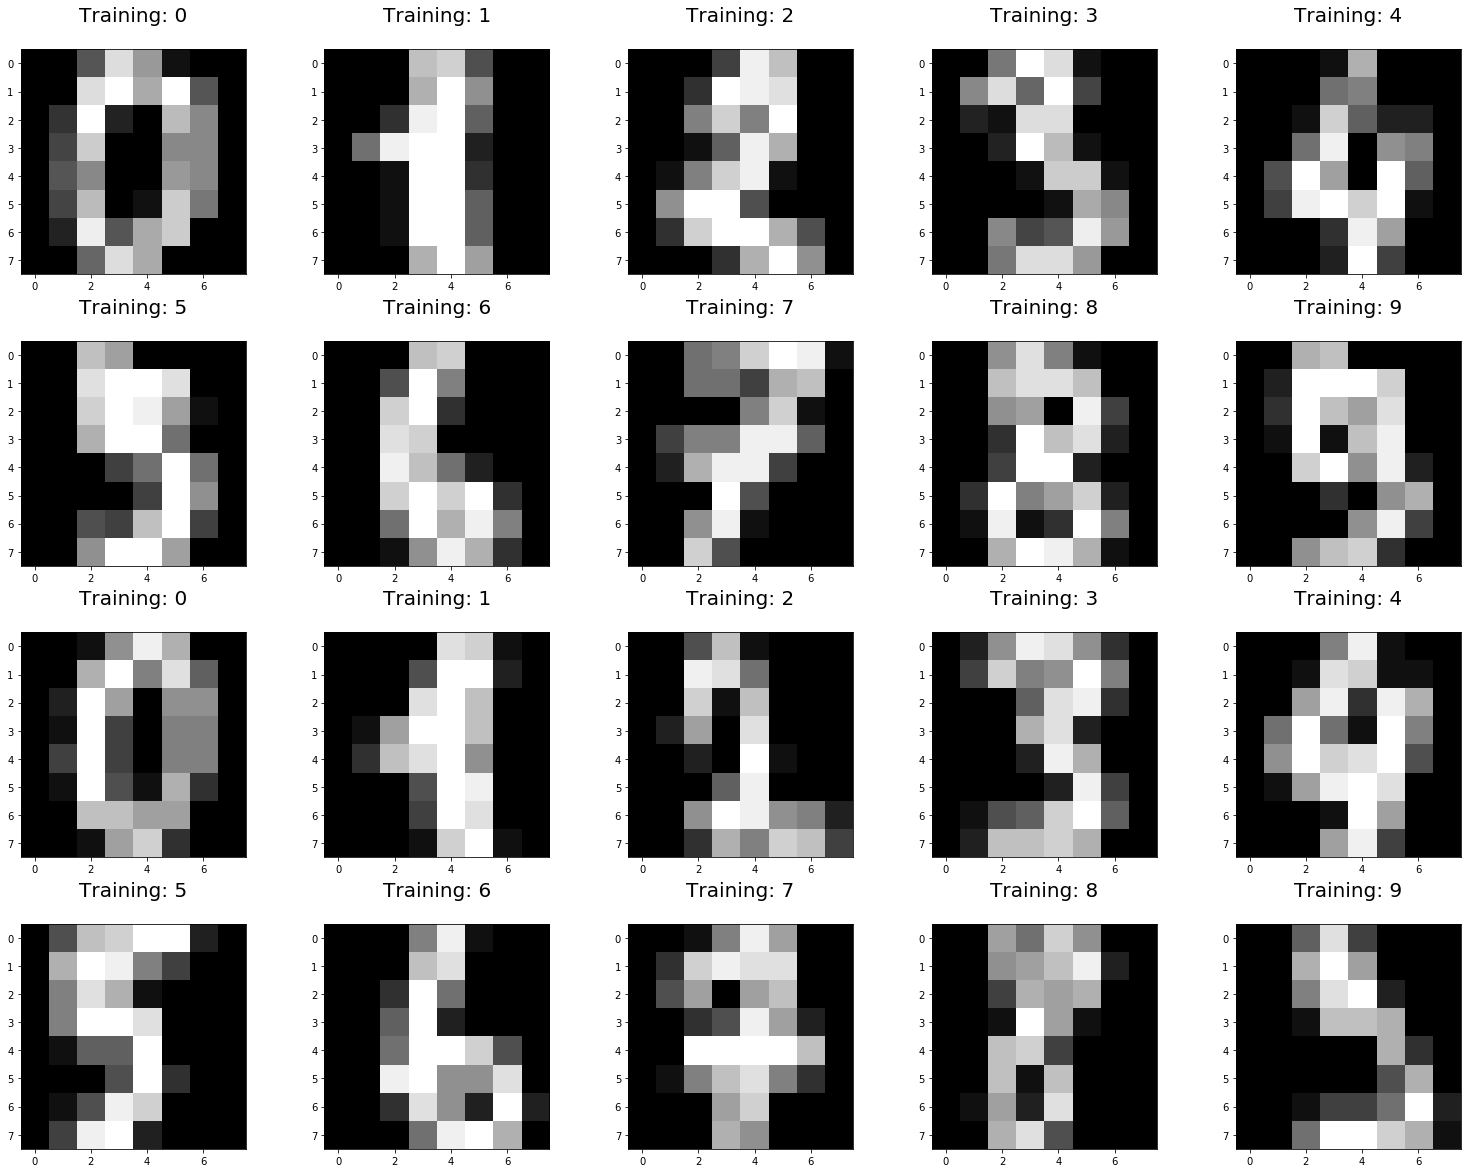

In [644]:
fig = plt.figure(figsize=(20, 16))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.35)
for index, (image, label) in enumerate(zip(digits.data[0:20], digits.target[0:20])):
    plt.subplot(4, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()

In [645]:
yNew= np.zeros((10,1797))
yNew.shape

(10, 1797)

In [646]:
for i in range(10):
     yNew[i] = y
       
        
yNew

array([[0., 1., 2., ..., 8., 9., 8.],
       [0., 1., 2., ..., 8., 9., 8.],
       [0., 1., 2., ..., 8., 9., 8.],
       ...,
       [0., 1., 2., ..., 8., 9., 8.],
       [0., 1., 2., ..., 8., 9., 8.],
       [0., 1., 2., ..., 8., 9., 8.]])

In [647]:
for g in range(10):
    for z in range(1797):
        if yNew[g][z] == g:
            yNew[g][z] = 1
            
        else:
            yNew[g][z] = 0


yNew = yNew.T


In [648]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, yNew, test_size=0.2, random_state=99)
print(y_test)
print(y_train)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [649]:
y_train.shape

(1437, 10)

In [650]:
x_train.shape

(1437, 64)

In [651]:

import numpy as np
import matplotlib.pyplot as plt
def g1(x):
    return 1. / (1 + np.exp(-x))
def g2(x):
    return 1. / (1 + np.exp(-x))
def g1_prime(x):
    return g1(x) * (1 - g1(x))

In [652]:
#Tanh
def Tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [653]:
def Tanh_d(x):
    return 1-(Tanh(x)*Tanh(x))

In [654]:
#Relu
def ReLU(x):
    return x * (x > 0)

def dReLU(x):
    return 1. * (x > 0)

In [655]:
#Leaky Relu
def L_ReLU_d(x, alpha=0.01):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx

In [656]:
def L_relu(data, epsilon=0.1):
    return np.maximum(epsilon * data, data)

In [657]:
def relu_prime(data, epsilon=0.1):
    gradients = 1. * (data > 0)
    gradients[gradients == 0] = epsilon
    return gradients

In [658]:
start_time= time.time()
def forewordPropagation(X, y, n_h, n_y, alpha, iterations):
    epoch = int(iterations//20)
    cost_list = [[],[]]
    m = X.shape[1]
    n_x = X.shape[0]
    W1 = np.random.randn(n_h, n_x)
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    for i in range(iterations):
        Z1 = np.dot(W1, X) + b1
        A1 = g1(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = g2(Z2)
        if i%epoch == 0:
            cost = -np.sum(y*np.log(A2) + (1-y)*np.log(1-A2))
            cost_list[0].append(i)
            cost_list[1].append(cost)
        dZ2 = A2 - y
        dW2 = (1/m) * np.dot(dZ2, A1.T)
        db2 = (1/m) * np.sum(dZ2)
        dZ1 = np.dot(W2.T, dZ2) * g1_prime(Z1)
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1)
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
      


    return W1, b1, W2, b2, cost_list




In [659]:
random.randn()
x1 = x_train.T
y1 = y_train.T
#x=np.c_[np.ones((len(y_train), 1)), x_train].T
#y1=np.array(y_train).reshape(10,len(y_train))
n_h = 200; n_y = 10
alpha = 0.8
iterations=10000
W1, b1, W2, b2, cost_list = forewordPropagation(x1, y1, n_h, n_y, alpha, iterations)
print('W1=',W1, '\n', 'b1=',b1, '\n', 'W2=',W2, '\n', 'b2=',b2)
end_time= time.time()

print('Elapsed time =', end_time-start_time)


W1= [[-0.05282381 -0.51200374 -0.73115373 ... -0.93109153 -0.63194557
   0.15024212]
 [ 1.25373277  0.53110914  1.10263686 ...  1.15241546 -0.41844345
  -1.67807501]
 [ 0.12269592 -1.52147137  0.99155996 ...  0.55457118 -0.6303806
   0.80025096]
 ...
 [-0.88313164  1.58801074 -0.89960107 ... -1.00580619 -1.18107735
  -0.1506875 ]
 [-0.94163302 -0.98202227  0.87446616 ... -0.07809435 -0.88136586
   0.22537168]
 [-0.2512379  -1.23843905 -0.15940571 ... -1.07813113  0.03370796
  -0.81889026]] 
 b1= [[-0.38266443]
 [-2.03746942]
 [-0.85158891]
 [-1.27902359]
 [ 1.83258399]
 [ 1.08071932]
 [-3.38329566]
 [-0.91617332]
 [-1.01751413]
 [-0.51218478]
 [-1.16491595]
 [-1.68382289]
 [ 0.12097181]
 [-0.31081285]
 [-1.27527735]
 [-0.94197233]
 [ 0.10111765]
 [-1.62506983]
 [-1.32910414]
 [ 1.19359568]
 [-0.94924529]
 [-1.61025415]
 [-1.24315958]
 [-0.70693809]
 [-1.77221945]
 [-2.16824125]
 [-1.03524335]
 [-1.41346048]
 [ 0.26145138]
 [-2.42128203]
 [-2.60567817]
 [-0.33567905]
 [ 0.07681136]
 [ 0

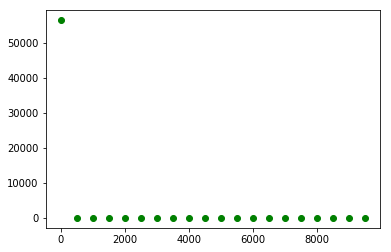

In [660]:
plt.plot(cost_list[0], cost_list[1], 'go')

In [661]:
y_test


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [662]:
Z1 = np.dot(W1, x_test.T) + b1
A1 = g1(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = g2(Z2)
predictions = A2.copy()

print('A2=',A2)

print('prediction1=',predictions.T)

A2.shape


A2= [[5.06550144e-08 2.49899196e-08 9.99999967e-01 ... 2.07136223e-05
  9.99980491e-01 6.94105374e-04]
 [1.08177894e-09 6.07125942e-10 1.82371131e-11 ... 8.93648192e-05
  1.82383854e-10 3.58281525e-07]
 [5.43954288e-05 2.24329392e-04 1.10672493e-05 ... 3.85434918e-08
  1.62384027e-04 5.90559176e-09]
 ...
 [3.16092179e-06 2.45115438e-08 1.86357263e-05 ... 1.04096189e-07
  3.86958774e-07 8.74684830e-07]
 [9.95179877e-01 9.64899500e-01 7.60804342e-07 ... 2.10015177e-05
  3.61246810e-09 2.64665312e-06]
 [1.13045244e-03 7.89101455e-08 8.16144385e-08 ... 4.23030175e-07
  3.41383889e-12 1.53636992e-12]]
prediction1= [[5.06550144e-08 1.08177894e-09 5.43954288e-05 ... 3.16092179e-06
  9.95179877e-01 1.13045244e-03]
 [2.49899196e-08 6.07125942e-10 2.24329392e-04 ... 2.45115438e-08
  9.64899500e-01 7.89101455e-08]
 [9.99999967e-01 1.82371131e-11 1.10672493e-05 ... 1.86357263e-05
  7.60804342e-07 8.16144385e-08]
 ...
 [2.07136223e-05 8.93648192e-05 3.85434918e-08 ... 1.04096189e-07
  2.10015177e-0

(10, 360)

In [663]:
index=np.argmax(A2,0)

In [664]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,\
recall_score, classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC


print('Classification Report:\n', classification_report(np.argmax(y_test,1), index))

print('Accuracy2:', accuracy_score(np.argmax(y_test,1), index))

Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        38
          1       0.85      0.97      0.90        29
          2       1.00      0.93      0.96        42
          3       0.93      0.97      0.95        40
          4       0.93      0.96      0.95        28
          5       0.94      0.97      0.96        35
          6       0.98      0.98      0.98        41
          7       0.94      0.98      0.96        45
          8       0.96      0.84      0.90        32
          9       0.93      0.83      0.88        30

avg / total       0.95      0.95      0.95       360

Accuracy2: 0.9472222222222222


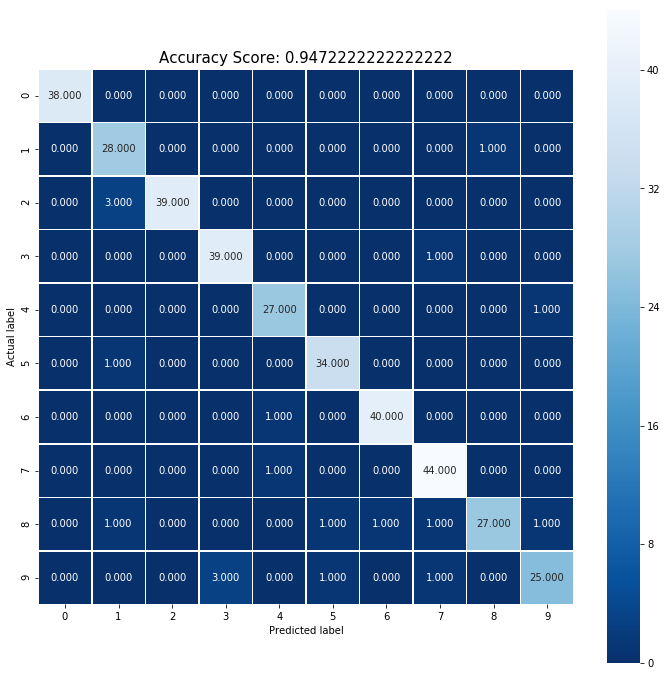

In [665]:
cm = metrics.confusion_matrix(np.argmax(y_test,1), index)
import seaborn as sns
score=accuracy_score(np.argmax(y_test,1), index)
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)

plt.title(all_sample_title, size = 15);
plt.show()

In [666]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target


In [667]:
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state= 99)
ppn = Perceptron(eta0 = 0.001)
ppn.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix  
predictions = ppn.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(cm)  
score = accuracy_score(y_test, predictions)
print(score)


[[38  0  0  0  0  0  0  0  0  0]
 [ 0 26  2  1  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  1]
 [ 0  1  0  0 26  0  0  1  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  1  0  0  0 40  0  0  0]
 [ 0  0  0  0  1  0  0 44  0  0]
 [ 0  1  2  1  0  0  1  0 27  0]
 [ 0  1  0  0  0  0  0  0  0 29]]
0.9611111111111111


C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
